In [19]:
from google.colab.patches import cv2_imshow

In [20]:
import cv2
import numpy as np

def dibujarContorno(contornos, color):
  for (i, c) in enumerate(contornos):
    M = cv2.moments(c)
    if (M["m00"]==0): M["m00"]==1
    x = int(M["m10"]/M["m00"])
    y = int(M["m01"]/M["m00"])
    cv2.drawContours(imagen, [c], 0, color, 2)
    cv2.putText(imagen, str(i+1), (x-10,y+10), 1, 2,(0,0,0),2)
amarilloBajo = np.array([20, 100, 20], np.uint8)
amarilloAlto = np.array([32, 255, 255], np.uint8)
violetaBajo = np.array([130, 100, 20], np.uint8)
violetaAlto = np.array([145, 255, 255], np.uint8)
verdeBajo = np.array([36, 100, 20], np.uint8)
verdeAlto = np.array([70, 255, 255], np.uint8)
rojoBajo1 = np.array([0, 100, 20], np.uint8)
rojoAlto1 = np.array([10, 255, 255], np.uint8)
rojoBajo2 = np.array([175, 100, 20], np.uint8)
rojoAlto2 = np.array([180, 255, 255], np.uint8)
imagen = cv2.imread('/content/drive/MyDrive/GoogleColab/lunares.png')
imagenHSV = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
#Detectando colores 
maskAmarillo = cv2.inRange(imagenHSV, amarilloBajo, amarilloAlto)
maskVioleta = cv2.inRange(imagenHSV, violetaBajo, violetaAlto)
maskVerde = cv2.inRange(imagenHSV, verdeBajo, verdeAlto)
maskRojo1 = cv2.inRange(imagenHSV, rojoBajo1, rojoAlto1)
maskRojo2 = cv2.inRange(imagenHSV, rojoBajo2, rojoAlto2)
maskRojo =  cv2.add(maskRojo1, maskRojo2)
#Encontrando contornos
#OpenCV 3
#contornosAmarillo = cv2.findContours(maskAmarillo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
#contornosVioleta = cv2.findContours(maskVioleta, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
#contornosVerde = cv2.findContours(maskVerde, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
#contornosRojo = cv2.findContours(maskRojo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
#OpenCV 4
contornosAmarillo = cv2.findContours(maskAmarillo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
contornosVioleta = cv2.findContours(maskVioleta, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
contornosVerde = cv2.findContours(maskVerde, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
contornosRojo = cv2.findContours(maskRojo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
dibujarContorno(contornosAmarillo, (0, 255,255))
dibujarContorno(contornosVioleta, (140, 40, 120))
dibujarContorno(contornosVerde, (0, 255, 0))
dibujarContorno(contornosRojo, (0, 0, 255))
#Imagen Resumen
imgResumen = 255 * np.ones((210,100,3), dtype = np.uint8)
cv2.circle(imgResumen, (30,30), 15, (0,255,255), -1)
cv2.circle(imgResumen, (30,70), 15, (140,40,120), -1)
cv2.circle(imgResumen, (30,110), 15, (0,255,0), -1)
cv2.circle(imgResumen, (30,150), 15, (0,0,255), -1)
cv2.putText(imgResumen,str(len(contornosAmarillo)),(65,40), 1, 2,(0,0,0),2)
cv2.putText(imgResumen,str(len(contornosVioleta)),(65,80), 1, 2,(0,0,0),2)
cv2.putText(imgResumen,str(len(contornosVerde)),(65,120), 1, 2,(0,0,0),2)
cv2.putText(imgResumen,str(len(contornosRojo)),(65,160), 1, 2,(0,0,0),2)
totalCnts = len(contornosAmarillo) + len(contornosVioleta) + len(contornosVerde) + len(contornosRojo)
cv2.putText(imgResumen,str(totalCnts),(55,200), 1, 2,(0,0,0),2)
cv2.imshow('Resumen', imgResumen)
#cv2.imshow('maskAmarillo', maskAmarillo)
#cv2.imshow('maskVioleta', maskVioleta)
#cv2.imshow('maskVerde', maskVerde)
#cv2.imshow('maskRojo', maskRojo)
cv2.imshow('Imagen', imagen)
cv2.imwrite('conteo.png', imagen)
cv2.waitKey(0)
cv2.destroyAllWindows()

DisabledFunctionError: ignored

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  68696      0 --:--:-- --:--:-- --:--:-- 67671


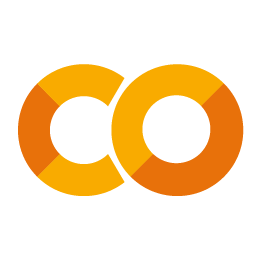

In [21]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)